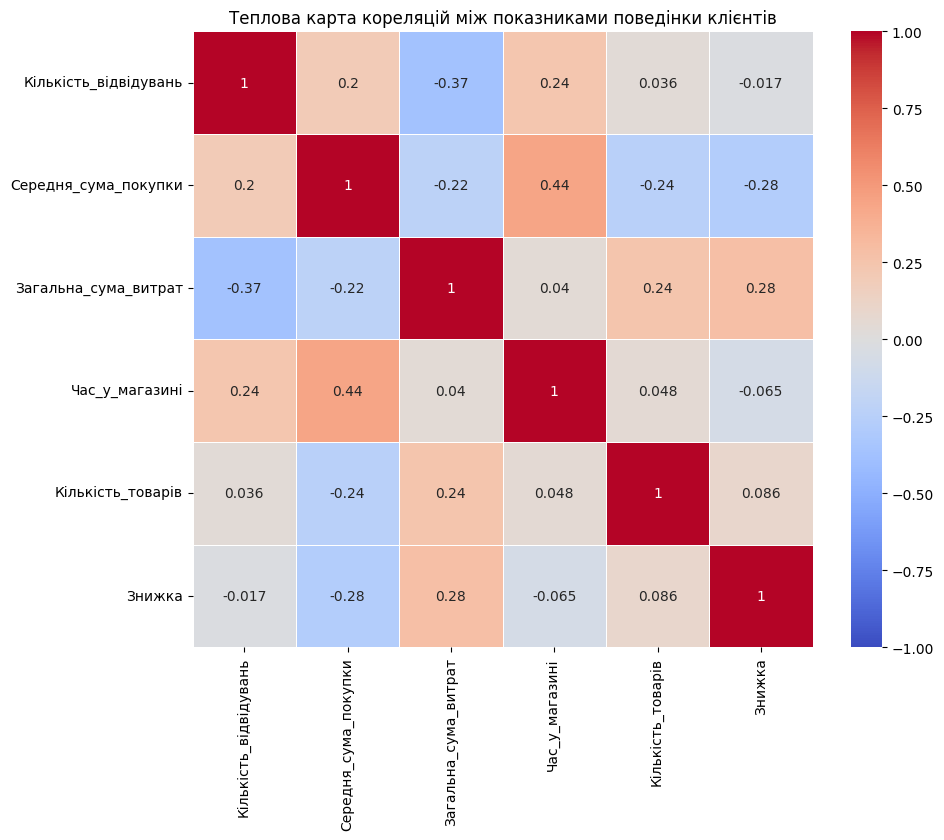

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

data = {
    "Кількість_відвідувань": np.random.randint(1, 20, 25),
    "Середня_сума_покупки": np.random.randint(200, 2000, 25),
    "Загальна_сума_витрат": np.random.randint(500, 15000, 25),
    "Час_у_магазині": np.random.randint(5, 60, 25),
    "Кількість_товарів": np.random.randint(1, 30, 25),
    "Знижка": np.random.randint(0, 30, 25)
}

df = pd.DataFrame(data)

corr_matrix = df.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Теплова карта кореляцій між показниками поведінки клієнтів")
plt.show()


Коефіцієнти Пірсона з 'Загальна_сума_витрат':
Кількість_відвідувань: 0.647
Середня_сума_покупки: 0.291
Використання_знижки : -0.101
Час_у_магазині      : -0.032
Кількість_товарів   : 0.237


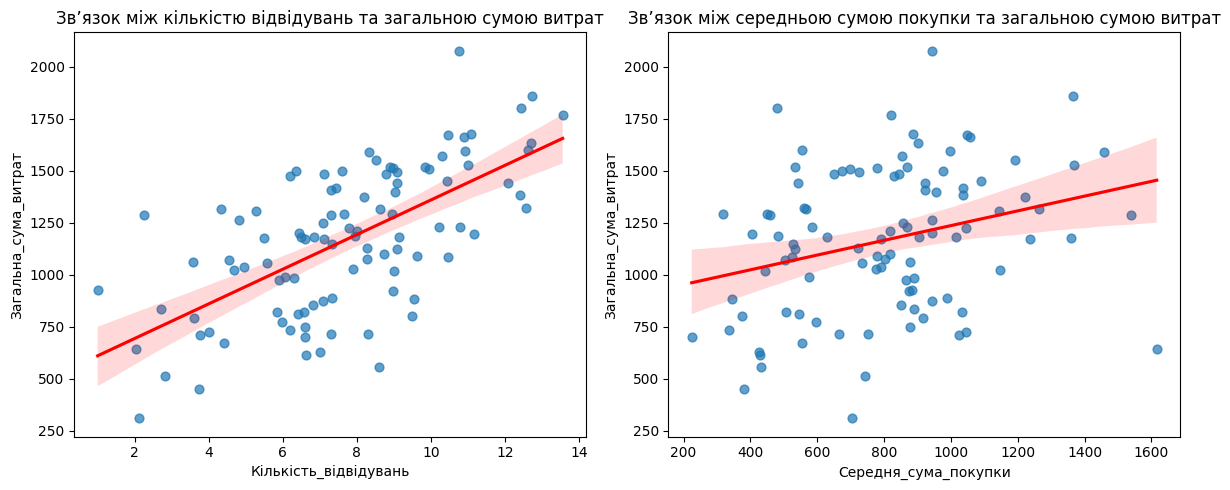

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

np.random.seed(42)

n = 100

visits = np.random.normal(8, 3, n).clip(1, 20)
avg_spent = np.random.normal(800, 300, n).clip(100, 2000)
discount_used = np.random.randint(0, 2, n)
time_in_store = np.random.normal(30, 10, n).clip(5, 60)
num_products = np.random.randint(1, 25, n)

total_spent = (
    80 * visits + 0.5 * avg_spent +
    50 * discount_used + 10 * num_products +
    np.random.normal(0, 200, n)
).clip(0, 20000)

df = pd.DataFrame({
    "Кількість_відвідувань": visits,
    "Середня_сума_покупки": avg_spent,
    "Використання_знижки": discount_used,
    "Час_у_магазині": time_in_store,
    "Кількість_товарів": num_products,
    "Загальна_сума_витрат": total_spent
})

print("Коефіцієнти Пірсона з 'Загальна_сума_витрат':")
for col in df.columns:
    if col != "Загальна_сума_витрат":
        corr, _ = pearsonr(df[col], df["Загальна_сума_витрат"])
        print(f"{col:20s}: {corr:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x="Кількість_відвідувань", y="Загальна_сума_витрат", data=df, ax=axes[0],
            scatter_kws={'s':40, 'alpha':0.7}, line_kws={"color":"red"})
axes[0].set_title("Зв’язок між кількістю відвідувань та загальною сумою витрат")

sns.regplot(x="Середня_сума_покупки", y="Загальна_сума_витрат", data=df, ax=axes[1],
            scatter_kws={'s':40, 'alpha':0.7}, line_kws={"color":"red"})
axes[1].set_title("Зв’язок між середньою сумою покупки та загальною сумою витрат")

plt.tight_layout()
plt.show()


Коефіцієнти Пірсона з Рівнем задоволеності:
Відвідування_на_місяць   : -0.029
Середня_сума_покупки     : 0.253
Використані_знижки       : 0.638


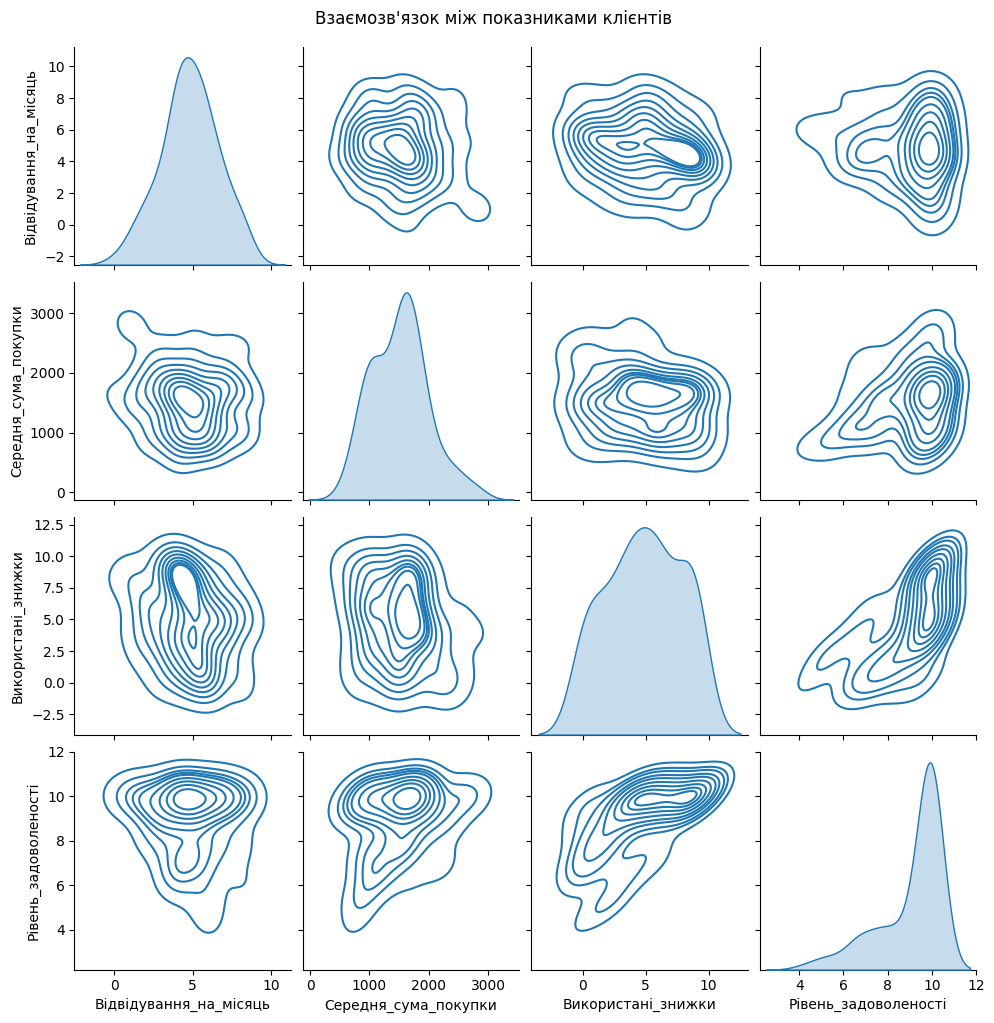

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

np.random.seed(42)

n = 100
visits_per_month = np.random.normal(5, 2, n).clip(0, 15)
avg_spent = np.random.normal(1500, 500, n).clip(300, 3000)
discount_usage = np.random.randint(0, 10, n)
satisfaction = (
    0.4*visits_per_month + 0.003*avg_spent +
    0.8*discount_usage + np.random.normal(0, 1, n)
).clip(0, 10)

df = pd.DataFrame({
    "Відвідування_на_місяць": visits_per_month,
    "Середня_сума_покупки": avg_spent,
    "Використані_знижки": discount_usage,
    "Рівень_задоволеності": satisfaction
})

print("Коефіцієнти Пірсона з Рівнем задоволеності:")
for col in ["Відвідування_на_місяць", "Середня_сума_покупки", "Використані_знижки"]:
    corr, _ = pearsonr(df[col], df["Рівень_задоволеності"])
    print(f"{col:25s}: {corr:.3f}")

sns.pairplot(
    df,
    vars=["Відвідування_на_місяць", "Середня_сума_покупки", "Використані_знижки", "Рівень_задоволеності"],
    kind="kde"
)
plt.suptitle("Взаємозв'язок між показниками клієнтів", y=1.02)
plt.show()
